In [13]:
import pandas as pd
import random
import datetime
import numpy as np

In [275]:
ad_ids = {'FB01' : ['01/04/2023', '30/06/2023', 13000, 300, 1.12, 0.95,'15/04/2023'],
          'FB02' : ['01/05/2023', '30/06/2023', 18000, 420, 1.11, 0.98, '01/06/2023'],
          'FB03' : ['01/05/2023', '15/05/2023', 9000, 290, 1.05, 0.82, '07/05/2023'],
          'X001'  : ['01/04/2023', '31/05/2023', 17000,350, 1.07, 0.94, '21/04/2023'], 
          'X002'  : ['01/06/2023', '30/06/2023', 14000,700, 1.13, 0.96, '14/06/2023'],
          'IG01' : ['01/04/2023', '15/05/2023', 16000,850, 1.15, 0.87, '23/04/2023'],
          'IG02' : ['01/05/2023', '30/06/2023', 22000,639, 1.14, 0.92, '25/05/2023'],
         'IG03' : ['01/06/2023', '30/06/2023', 10000,550, 1.12, 0.85, '27/06/2023']}

plat = {'FB' : ['Facebook', [0.8, 0.6, 0.3, 0.5],[0.05, 0.04, 0.03, 0.08]],
        'X0' : ['X', [0.6, 0.3, 0.2, 0.25],[0.15, 0.09, 0.1, 0.07]],
        'IG' : ['Instagram', [0.82, 0.7, 0.5, 0.61],[0.08, 0.05, 0.02, 0.12]]}

In [276]:
start_date = pd.to_datetime('01/04/2023', format = '%d/%m/%Y')
end_date = pd.to_datetime('01/07/2023', format = '%d/%m/%Y')

dates = []
codes = []
platforms = []
views = []
likes = []
comments = []
shares = []
clicks = []

while start_date < end_date:
    
    for ad in ad_ids.keys():
        if start_date >= pd.to_datetime(ad_ids[ad][0], format = '%d/%m/%Y') and start_date <= pd.to_datetime(ad_ids[ad][1], format = '%d/%m/%Y'):
            if start_date < pd.to_datetime(ad_ids[ad][6], format = '%d/%m/%Y'):
                ad_ids[ad][2] = int(round(ad_ids[ad][2] * np.random.normal(ad_ids[ad][4], 0.06),0))
            else:
                ad_ids[ad][2] = int(round(ad_ids[ad][2] * np.random.normal(ad_ids[ad][5], 0.05),0))
            if start_date.day > 4:
                base = ad_ids[ad][2] * 1.2
            else:
                base = ad_ids[ad][2] * 0.98
            p = ad[0:2]
            view = int(round(np.random.normal(base, ad_ids[ad][3]),0))
            like = int(round(view * np.random.normal(plat[p][1][0], plat[p][2][0]),0))
            comment = int(round(view * np.random.normal(plat[p][1][1], plat[p][2][1]),0))
            share = int(round(view * np.random.normal(plat[p][1][2], plat[p][2][2]),0))
            click = int(round(view * np.random.normal(plat[p][1][3], plat[p][2][3]),0))
            dates.append(start_date)
            codes.append(ad)
            platforms.append(plat[p][0])
            views.append(view)
            likes.append(like)
            comments.append(comment)
            shares.append(share)
            clicks.append(click)
        else:
            pass
        
    start_date = start_date + datetime.timedelta(days = 1)
 



In [277]:
df = pd.DataFrame({'Date' : dates, 'Advert Code' : codes, 'Platform' : platforms, 'Views' : views,
                   'Likes' : likes, 'Comments' : comments, 'Shares' : shares, 
                   'Clicks' : clicks})

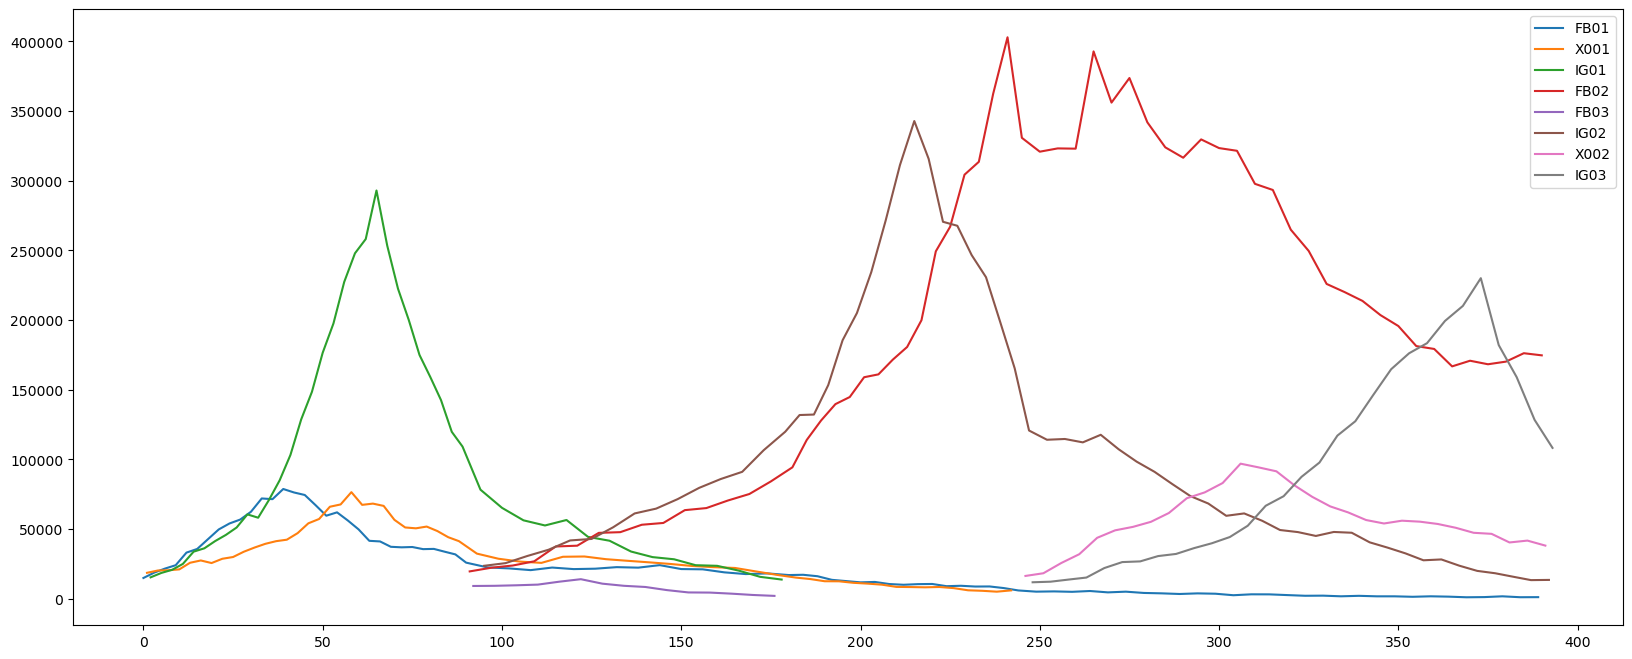

In [278]:


fig, ax = plt.subplots(figsize = (20, 8))

for i in df['Advert Code'].unique():

    ax.plot(df[df['Advert Code'] == i].index, df[df['Advert Code'] == i].Views, label = i)
    ax.legend()

In [279]:
df.to_csv('Pontoon_ads.csv', index = False)

In [280]:
df = df.set_index('Date')

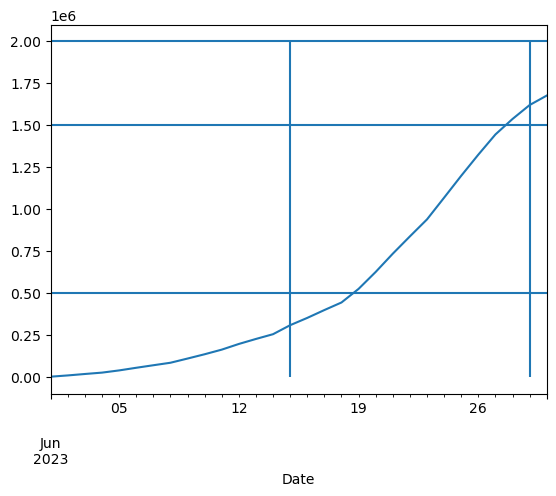

In [282]:
df[df['Advert Code'] == 'IG03'].Clicks.cumsum().plot()
plt.hlines(y = 2000000, xmin = '2023-04-01', xmax = '2023-07-01')
plt.hlines(y = 1500000, xmin = '2023-04-01', xmax = '2023-07-01')
plt.hlines(y = 500000, xmin = '2023-04-01', xmax = '2023-07-01')
plt.vlines(x = '2023-06-15', ymin = 0, ymax = 2000000)
plt.vlines(x = '2023-06-29', ymin = 0, ymax = 2000000)
#plt.vlines(x = '2023-05-13', ymin = 0, ymax = 2000000)

In [283]:
two_week_target = [120000, 60000, 500000]
four_week_target = [600000, 250000, 1500000]
six_week_target = [700000, 300000, 2000000]

In [284]:
df2 = pd.DataFrame({'Platform' : ['Facebook','X','Instagram'], 'Week 2' : two_week_target,
                   'Week 4' : four_week_target, 'Week 6' : six_week_target})

In [285]:
df2.to_csv('advert_targets.csv', index = False)

In [188]:
df

,Date,Advert Code,Platform,Views,Likes,Comments,Shares,Clicks
0,2023-04-01,FB01,Facebook,13853,10596,9464,4497,7677
1,2023-04-01,X001,X,19109,10785,7345,7049,4030
2,2023-04-01,IG01,Instagram,16933,15175,11853,8274,13724
3,2023-04-02,FB01,Facebook,15356,11648,9511,3889,9113
4,2023-04-02,X001,X,19452,13806,5741,2436,5044
...,...,...,...,...,...,...,...,...
389,2023-06-30,FB01,Facebook,357,268,242,113,123
390,2023-06-30,FB02,Facebook,215033,173498,127887,56753,91291
391,2023-06-30,X002,X,37870,24997,12499,2312,7177
392,2023-06-30,IG02,Instagram,32489,23954,24143,15650,19017


In [234]:
df[df['Advert Code'] == 'IG01']

,Advert Code,Platform,Views,Likes,Comments,Shares,Clicks
Date,,,,,,,
2023-04-01,IG01,Instagram,17274,11601,11854,9229,11905
2023-04-02,IG01,Instagram,17920,14075,12619,9334,9334
2023-04-03,IG01,Instagram,22722,18349,18268,11040,14407
2023-04-04,IG01,Instagram,26983,24323,19679,14447,18035
2023-04-05,IG01,Instagram,34773,27862,26264,17029,18432
2023-04-06,IG01,Instagram,41679,32562,25827,20829,30559
2023-04-07,IG01,Instagram,47426,32701,32053,23582,33476
2023-04-08,IG01,Instagram,57587,46149,41092,29968,33804
2023-04-09,IG01,Instagram,63449,55726,43191,32755,31907
